<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/Copy_of_LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [2]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
iris_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

import pandas as pd

df = pd.read_csv(iris_data_url)
print(df.shape)
df.head

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

<bound method NDFrame.head of      5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]>

In [9]:
df = pd.read_csv(iris_data_url, header=0) 
df.columns = ['length in cm', 'width in cm', 'petal length in cm', 'petal width in cm', 'class']


print(df.shape)
df.head()



(149, 5)


,length in cm,width in cm,petal length in cm,petal width in cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
# check for missing values
df.isnull()
df.isnull().sum()

length in cm          0
width in cm           0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [12]:
# look at the last 5 rows of a dataset
df.tail()

,length in cm,width in cm,petal length in cm,petal width in cm,class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
#summary of numeric numbers
df.describe()

,length in cm,width in cm,petal length in cm,petal width in cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
#summary of nonnumeric numbers
df.describe(exclude='number')

,class
count,149
unique,3
top,Iris-versicolor
freq,50


In [32]:
df.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [17]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
from google.colab import files
uploaded = files.upload()

Saving new.data to new.data


In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/new.data


In [19]:
import pandas as pd
df = pd.read_csv("new.data")

print(df.shape)
df.head

(18491, 1)


<bound method NDFrame.head of        1 15943882 63 1 -9 -9 -9
0      -27 1 145 1 233 -9 50 20
1            1 0 1 2 2 3 1981 0
2           0 0 0 0 1 10.5 6 13
3      150 60 190 90 145 85 0 0
4        2.3 3 -9 -9 0 -9 -9 -9
...                         ...
18486    -9 -9 0 -1 -1 -1 -1 -1
18487      -1 -1 -1 -1 -1 1 1 1
18488     1 1 -9 -9 -9 -9 -9 -9
18489   -9 -9 -9 -9 -9 -9 -9 -9
18490              -9 -9 Takacs

[18491 rows x 1 columns]>

In [29]:
#fix column names
df = pd.read_csv("new.data", header = 0)
df.columns = ['patient identification number', 'ccf: social security number', 'age', 'sex']
print(df.shape)
df.head

ValueError: ignored

In [20]:
#Check for missing values
df.isnull().sum()

1 15943882 63 1 -9 -9 -9    0
dtype: int64

In [22]:
#look at the last 5 rows
df.tail()

,1 15943882 63 1 -9 -9 -9
18486,-9 -9 0 -1 -1 -1 -1 -1
18487,-1 -1 -1 -1 -1 1 1 1
18488,1 1 -9 -9 -9 -9 -9 -9
18489,-9 -9 -9 -9 -9 -9 -9 -9
18490,-9 -9 Takacs


In [23]:
#Summary of numeric numbers
df.describe()

,1 15943882 63 1 -9 -9 -9
count,18491
unique,10130
top,-9 -9 -9 -9 -9 -9 0 0
freq,1340


In [24]:
#Summary of nonnumeric numbers
df.describe(exclude='number')

,1 15943882 63 1 -9 -9 -9
count,18491
unique,10130
top,-9 -9 -9 -9 -9 -9 0 0
freq,1340


In [0]:
#New data set
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [38]:
column_headers = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines', 'Proline']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=column_headers)

print(df.shape)
df.head()

(32561, 13)


,,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df.dtypes

Alcohol                  int64
Malic acid              object
Ash                      int64
Alcalinity of ash       object
Magnesium               object
Total phenols           object
Flavanoids              object
Nonflavanoid phenols    object
Proanthocyanins          int64
Color intensity          int64
Hue                      int64
diluted wines           object
Proline                 object
dtype: object

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [41]:
pd.crosstab(df['Proline'], df['diluted wines'])

diluted wines,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
Proline,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,437,12,82,55,57,70,68,24,97,60,17,93,21,61,40,1,12,14,10,60,25,19,48,71,38,16,610,32,14,29,137,48,33,102,9,64,31,15,17,21999,62,10
>50K,146,7,39,20,2,25,2,4,9,30,12,44,8,3,4,0,1,6,3,40,18,5,25,10,24,2,33,2,0,2,61,12,4,12,3,16,20,3,2,7171,5,6


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

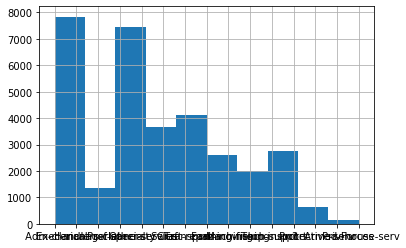

In [42]:
# Your Code Here
df['Magnesium'].hist();

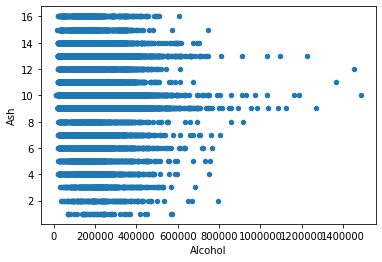

In [45]:
df.plot.scatter('Alcohol', 'Ash');

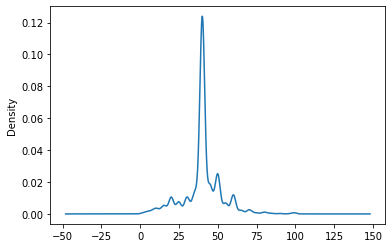

In [47]:
df['Hue'].plot.density()

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [48]:
# Your Code Here
table = pd.crosstab(df['Alcohol'], df['Ash'])
table


Ash,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Alcohol,,,,,,,,,,,,,,,,
12285,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13769,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14878,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19214,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226583,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1268339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1366120,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


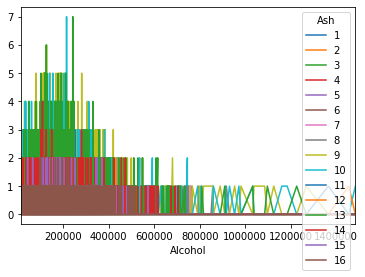

In [49]:
table.plot()

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.